<center>Национальный исследовательский университет ИТМО<br/>Факультет информационных технологий и программирования<br/>Прикладная математика и информатика</center>

## <center>Математическая статистика</center>
### <center>Отчёт по лабораторной работе №2</center>

<div style="text-align: right"><b>Работу выполнили:</b><br/>Белоцерковченко Андрей M3237<br/>Смирнов Андрей M3237<br/</div>

<center>Санкт-Петербург<br/>2023</center>

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm

In [2]:
ns = [10, 100, 500, 1000, 5000, 10000]
m = 1000
# Заданный параметр
theta_true = 5
# Заданный уровень значимости для проверки отклонения оценки от истинного параметра
significance_level = 0.05

In [3]:
# Функция плотности распределения
def f(theta, x):
    return (3 * x**2 / np.sqrt(2 * np.pi)) * np.exp(-((theta - x**3)**2) / 2)

## Функция оценки
Метод максимального правдоподобия (MLE)
Метод максимального правдоподобия (MLE) - это статистический метод оценки параметров модели, который используется для нахождения таких значений параметров, которые максимизируют вероятность (или плотность вероятности) наблюдаемых данных. Этот метод часто используется в статистике, эконометрике и машинном обучении для оценки параметров статистических моделей.

Основные понятия
1. Функция правдоподобия (Likelihood Function): Это функция, которая оценивает вероятность наблюдаемых данных при заданных параметрах модели. Обозначается как $L(θ | X)$, где $θ$ - параметры модели, $X$ - наблюдаемые данные.

2. Логарифмическая функция правдоподобия (Log-Likelihood Function): Это логарифм функции правдоподобия. Обычно используется для упрощения вычислений и оптимизации.

3. Максимизация правдоподобия (Maximization of Likelihood): Этот этап заключается в нахождении таких значений параметров ($θ$), которые максимизируют функцию правдоподобия (или логарифмическую функцию правдоподобия) для данной выборки данных.
Пусть есть выборка $X_1, \ldots, X_n$ из распределения $\mathbb{P}_\theta$, где $\theta \in \Theta$ — неизвестные параметры. Пусть $\mathcal{L}(\cdot|\theta):\Theta\to\mathbb{R}$ — функция правдоподобия, где $\cdot \in \mathbb{R}^{n}$. Точечная оценка:
$$\hat{\theta}_{\mathrm{M\Pi}} = \hat{\theta}_{\mathrm{M\Pi}}(X_1, \ldots, X_n) = \arg\max_{\theta \in \Theta} \mathcal{L}(X_1, \ldots, X_n|\theta)
$$

In [4]:
# Функция для оценки параметра методом максимального правдоподобия
def estimate_theta(sample):
    # Логарифмическая функция правдоподобия
    log_likelihood = lambda theta: -np.sum(np.log(f(theta, sample)))

    # Максимизация логарифмической функции правдоподобия с использованием minimize
    result = minimize(log_likelihood, x0=0, method='Nelder-Mead')

    return result.x[0]

## Визуализация данных

In [5]:
def visualize(n, deviations, variance, biases, mse):
    print(f"n = {n}")
    print(f"Количество отклонений = {deviations}")
    print(f"Дисперсия = {variance}")
    
    # Визуализация результатов
    plt.figure(figsize=(12, 5))
    
    plt.subplot(131)
    plt.hist(biases, bins=50, color='b', alpha=0.6)
    plt.title("Смещение")
    
    plt.subplot(133)
    plt.hist(mse, bins=50, color='r', alpha=0.6)
    plt.title("Среднеквадратичная ошибка (MSE)")
    
    plt.tight_layout()
    plt.show()

## Формирование выборки, вычисление дисперсии и других параметров.
Исходная функция плотности выглядит следующим образом:
$$f_\theta(x) = \frac{3x^2}{\sqrt{2\pi}} \exp\left(-\frac{(\theta - x^3)^2}{2}\right)$$
Тогда несложно из нее получить функцию распределения нашей случайной величины:
$$F_\theta(x) = \frac{1}{2} \left(1 - erf\left(\frac{\theta - x^3}{\sqrt(2)}\right)\right)$$
Функция нормального стандартного распределение имеет следующий вид:
$$\Phi(x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{x} e^{-\frac{x^2}{2}}\,dx.$$
Тогда можно догадаться, что $\Phi(-(\theta - x^3)) = F(x)$, а уже из этого можно выразить $x$ через обратную к функции распределения квантильную функцию стандартного нормального закона:
$$x = \sqrt[3]{\theta + \Phi^{-1}(y)}$$

n = 10
Количество отклонений = 217
Дисперсия = 0.09086928181087538


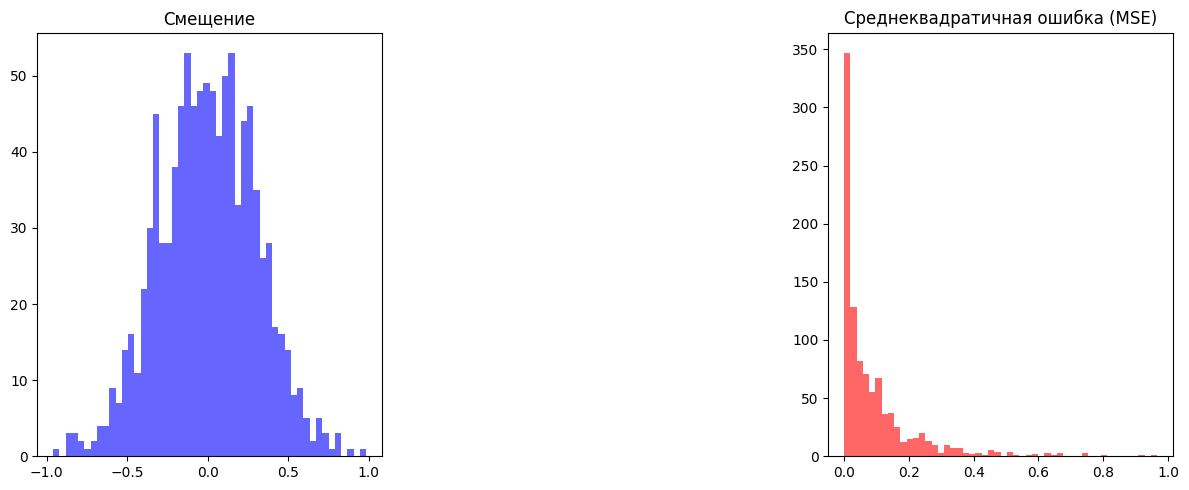

n = 100
Количество отклонений = 7
Дисперсия = 0.009335064907125044


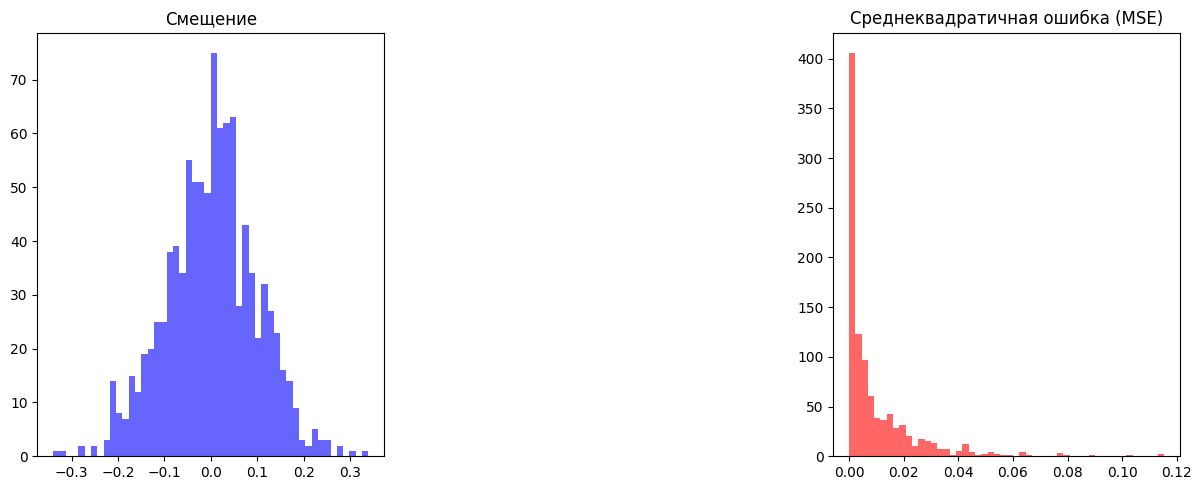

n = 500
Количество отклонений = 0
Дисперсия = 0.002118766468359377


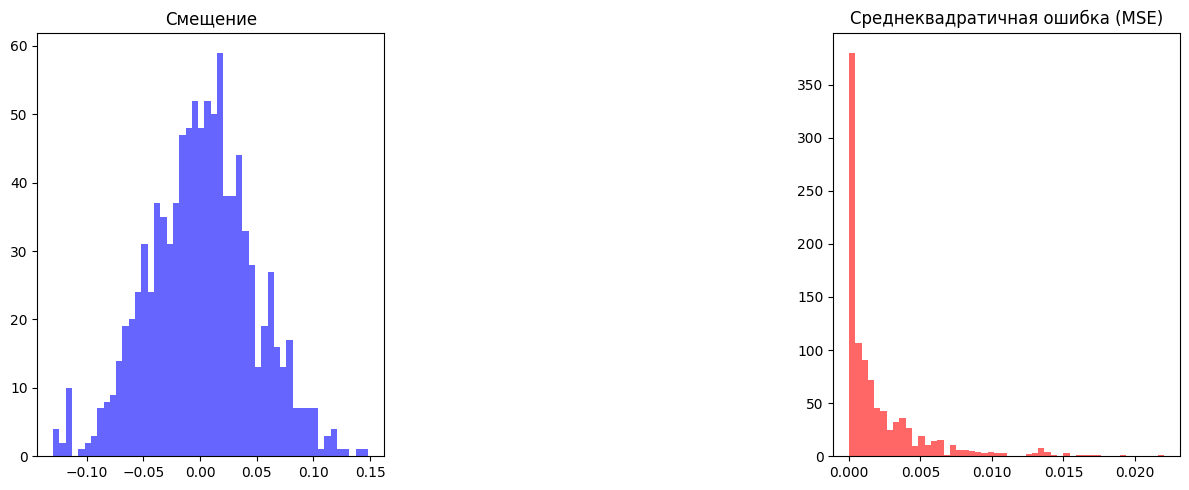

n = 1000
Количество отклонений = 0
Дисперсия = 0.0010166361460585956


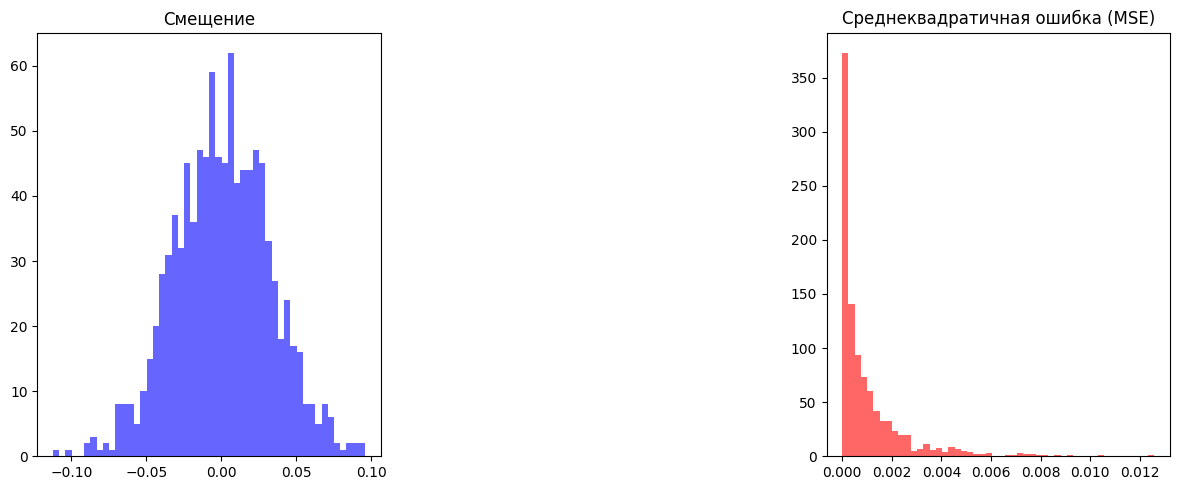

n = 5000
Количество отклонений = 0
Дисперсия = 0.00019596476543359403


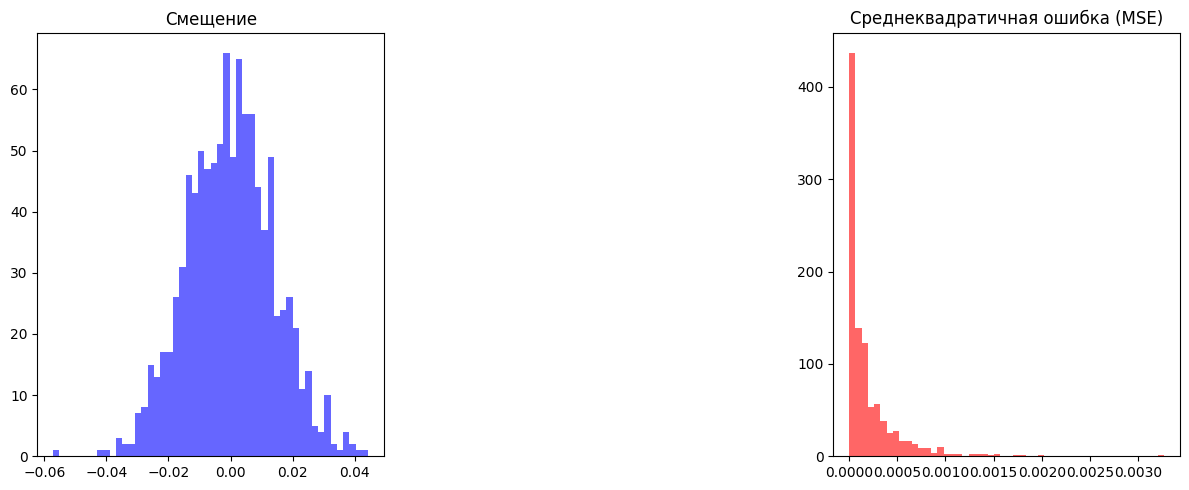

n = 10000
Количество отклонений = 0
Дисперсия = 9.695699949609381e-05


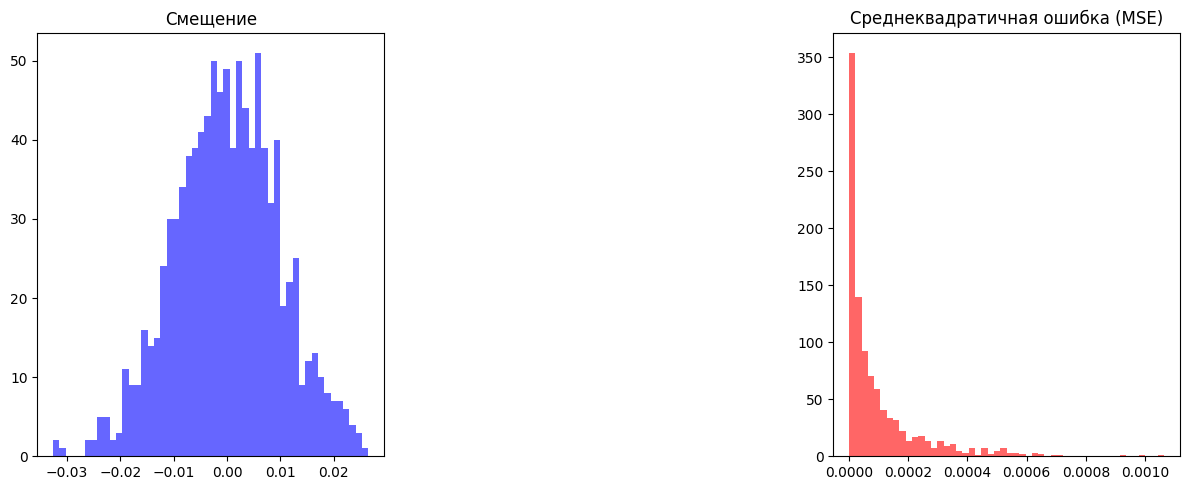

In [8]:
for n in ns:
    deviations = 0
    estimates = []
    biases = []
    mse = []
    thetas = []

    for _ in range(m):
        # Генерация выборки
        samples = np.random.uniform(0, 1, n)
        xs = np.cbrt(theta_true + norm.ppf(samples))

        # Оценка параметра методом максимального правдоподобия
        theta_hat = estimate_theta(xs)
        thetas.append(theta_hat)

        # Рассчет смещения
        bias = theta_hat - theta_true
        biases.append(bias)

        # Рассчет среднеквадратичной ошибки (MSE)
        mse.append((theta_hat - theta_true)**2)

        # Проверка отклонения от истинного параметра
        z_score = (theta_hat - theta_true) / theta_true
        if z_score > significance_level:
            deviations += 1
         
    #Считаем дисперсию
    variance = np.var(thetas)
            
    visualize(n, deviations, variance, biases, mse)

## Байесовские оценки

Нам нужно найти байесовскую оценку $\theta$ относительно квадаратичной ошибки, при условии, что $X_1, X_2 \dots X_n \sim N(\theta, 1)$, а $\theta \sim N(0, 1)$

Как говорилось ранее, оценку мы считаем относительно квадратичной ошибки $err(\hat{\theta}, \theta)$